In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'/Users/suryasaikadali/Downloads/pw_skills/end_to_End_projects/student_performance/notebooks'

In [3]:
df = pd.read_csv('/Users/suryasaikadali/Downloads/pw_skills/end_to_End_projects/student_performance/artifacts/data.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [9]:
def fun_counts(col):
    for i in col:
        print(df[i].value_counts())
        print('%%%%%%%%%%%%%%%%%%%%')

In [10]:
col = ['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']

In [11]:
fun_counts(col)

gender
female    518
male      482
Name: count, dtype: int64
%%%%%%%%%%%%%%%%%%%%
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
%%%%%%%%%%%%%%%%%%%%
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
%%%%%%%%%%%%%%%%%%%%
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
%%%%%%%%%%%%%%%%%%%%
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
%%%%%%%%%%%%%%%%%%%%


In [12]:
df.duplicated().sum()

np.int64(0)

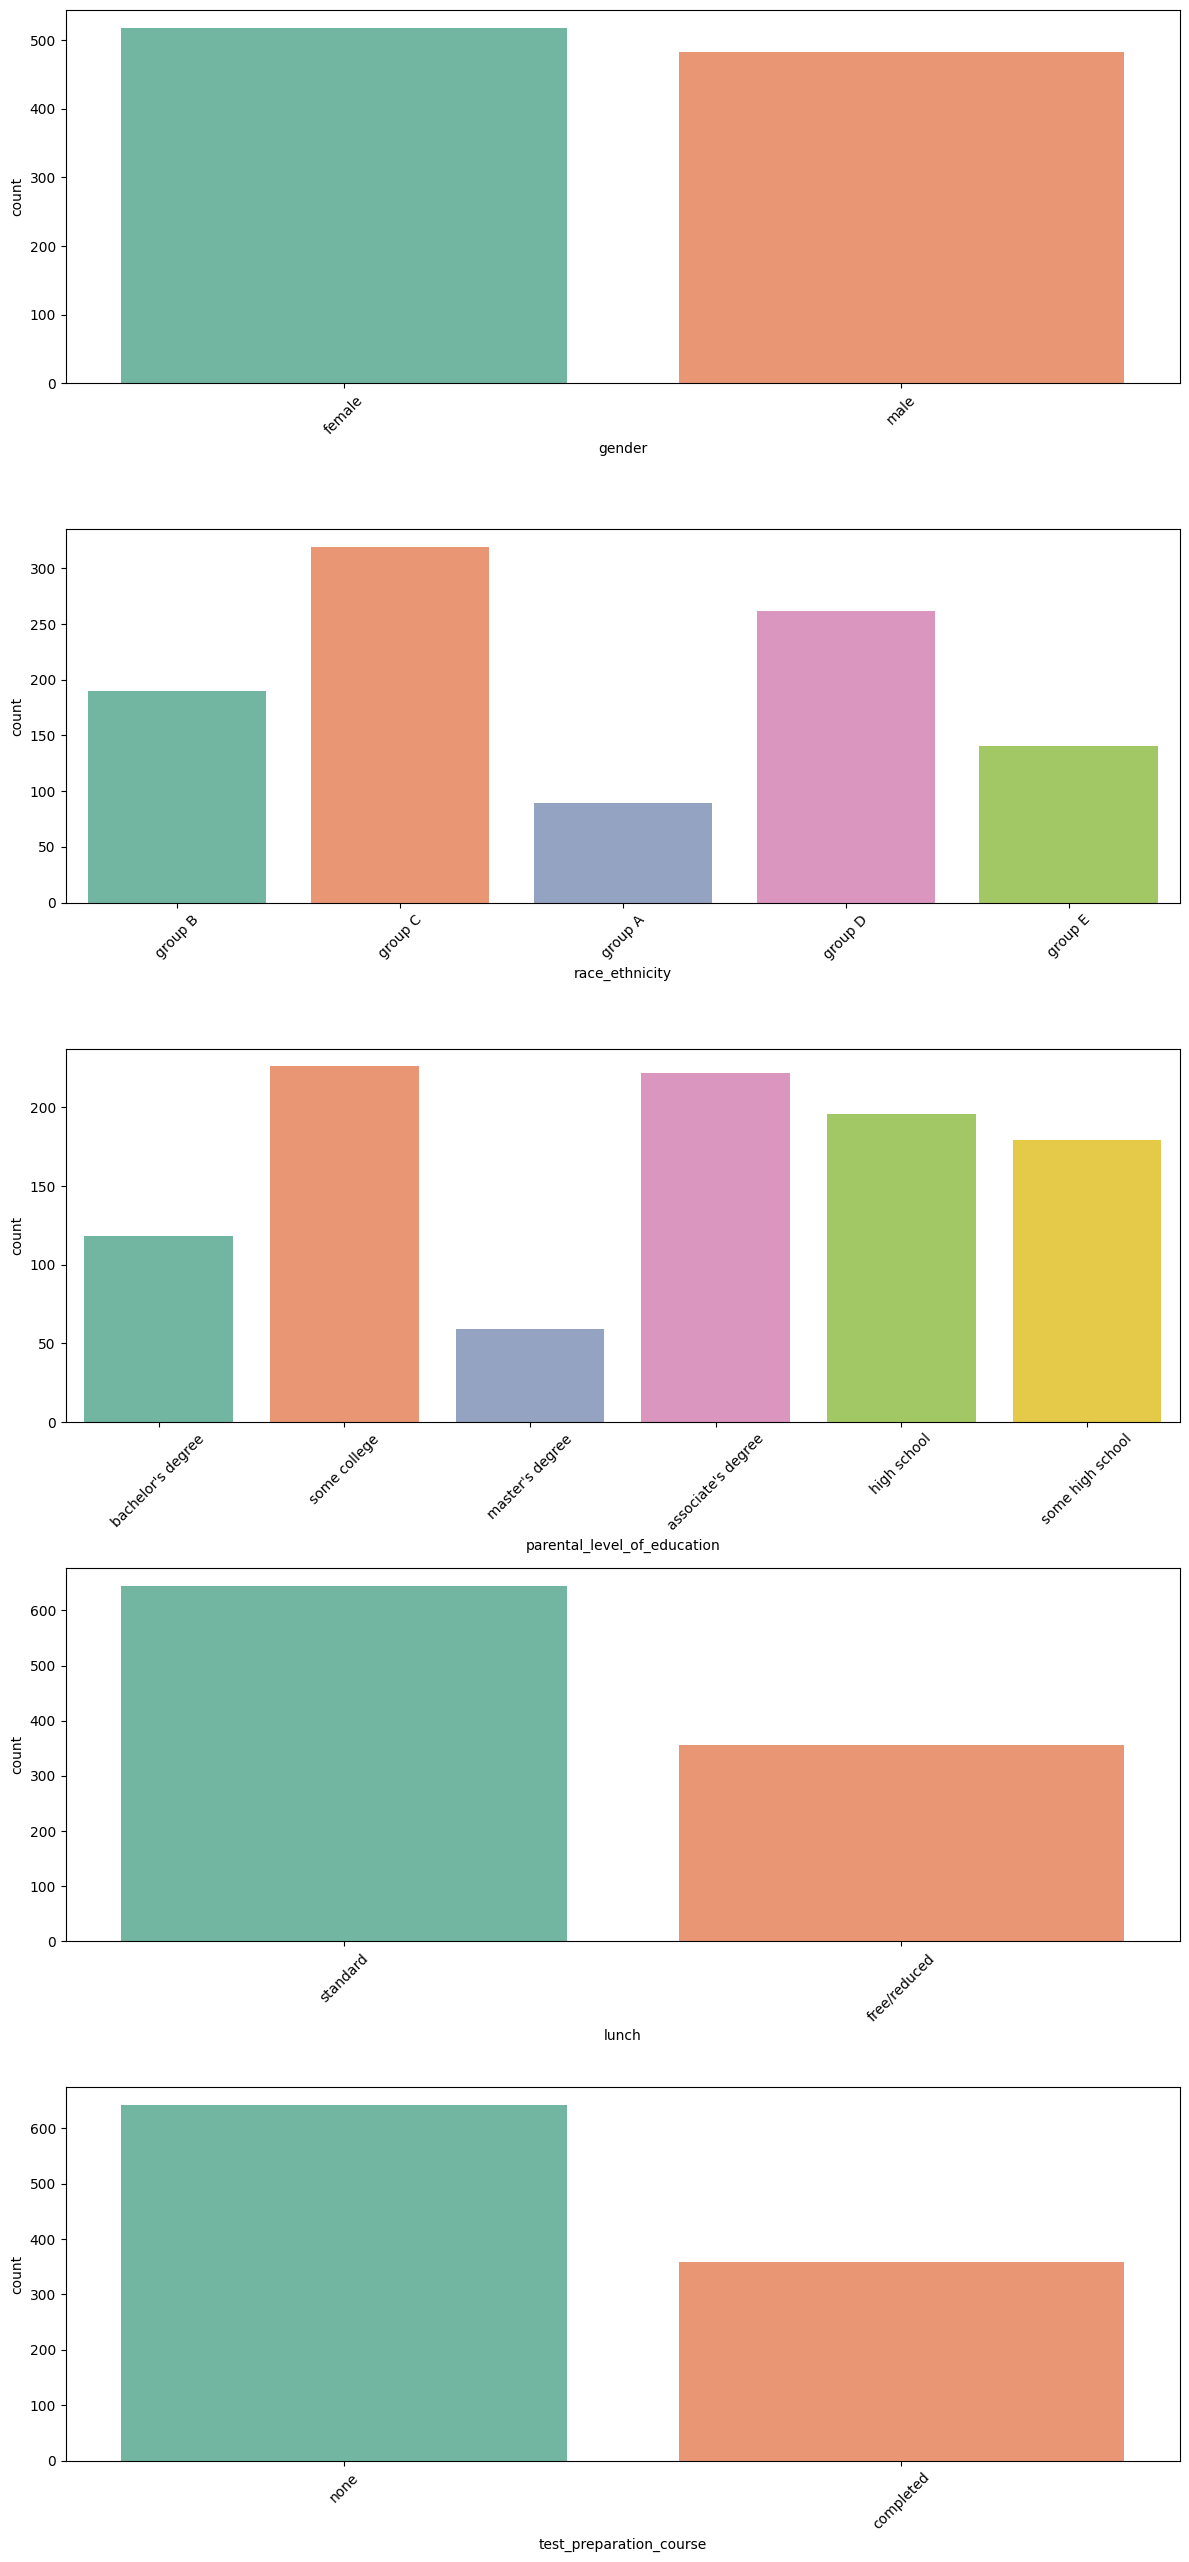

In [13]:
# INorder to see the value counts of categorical variables we use count plot
plt.figure(figsize=(12,30))

for i in range(len(col)):
    plt.subplot(6,1,i+1)
    sns.countplot(x = df[col[i]], palette="Set2")
    plt.xlabel(col[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

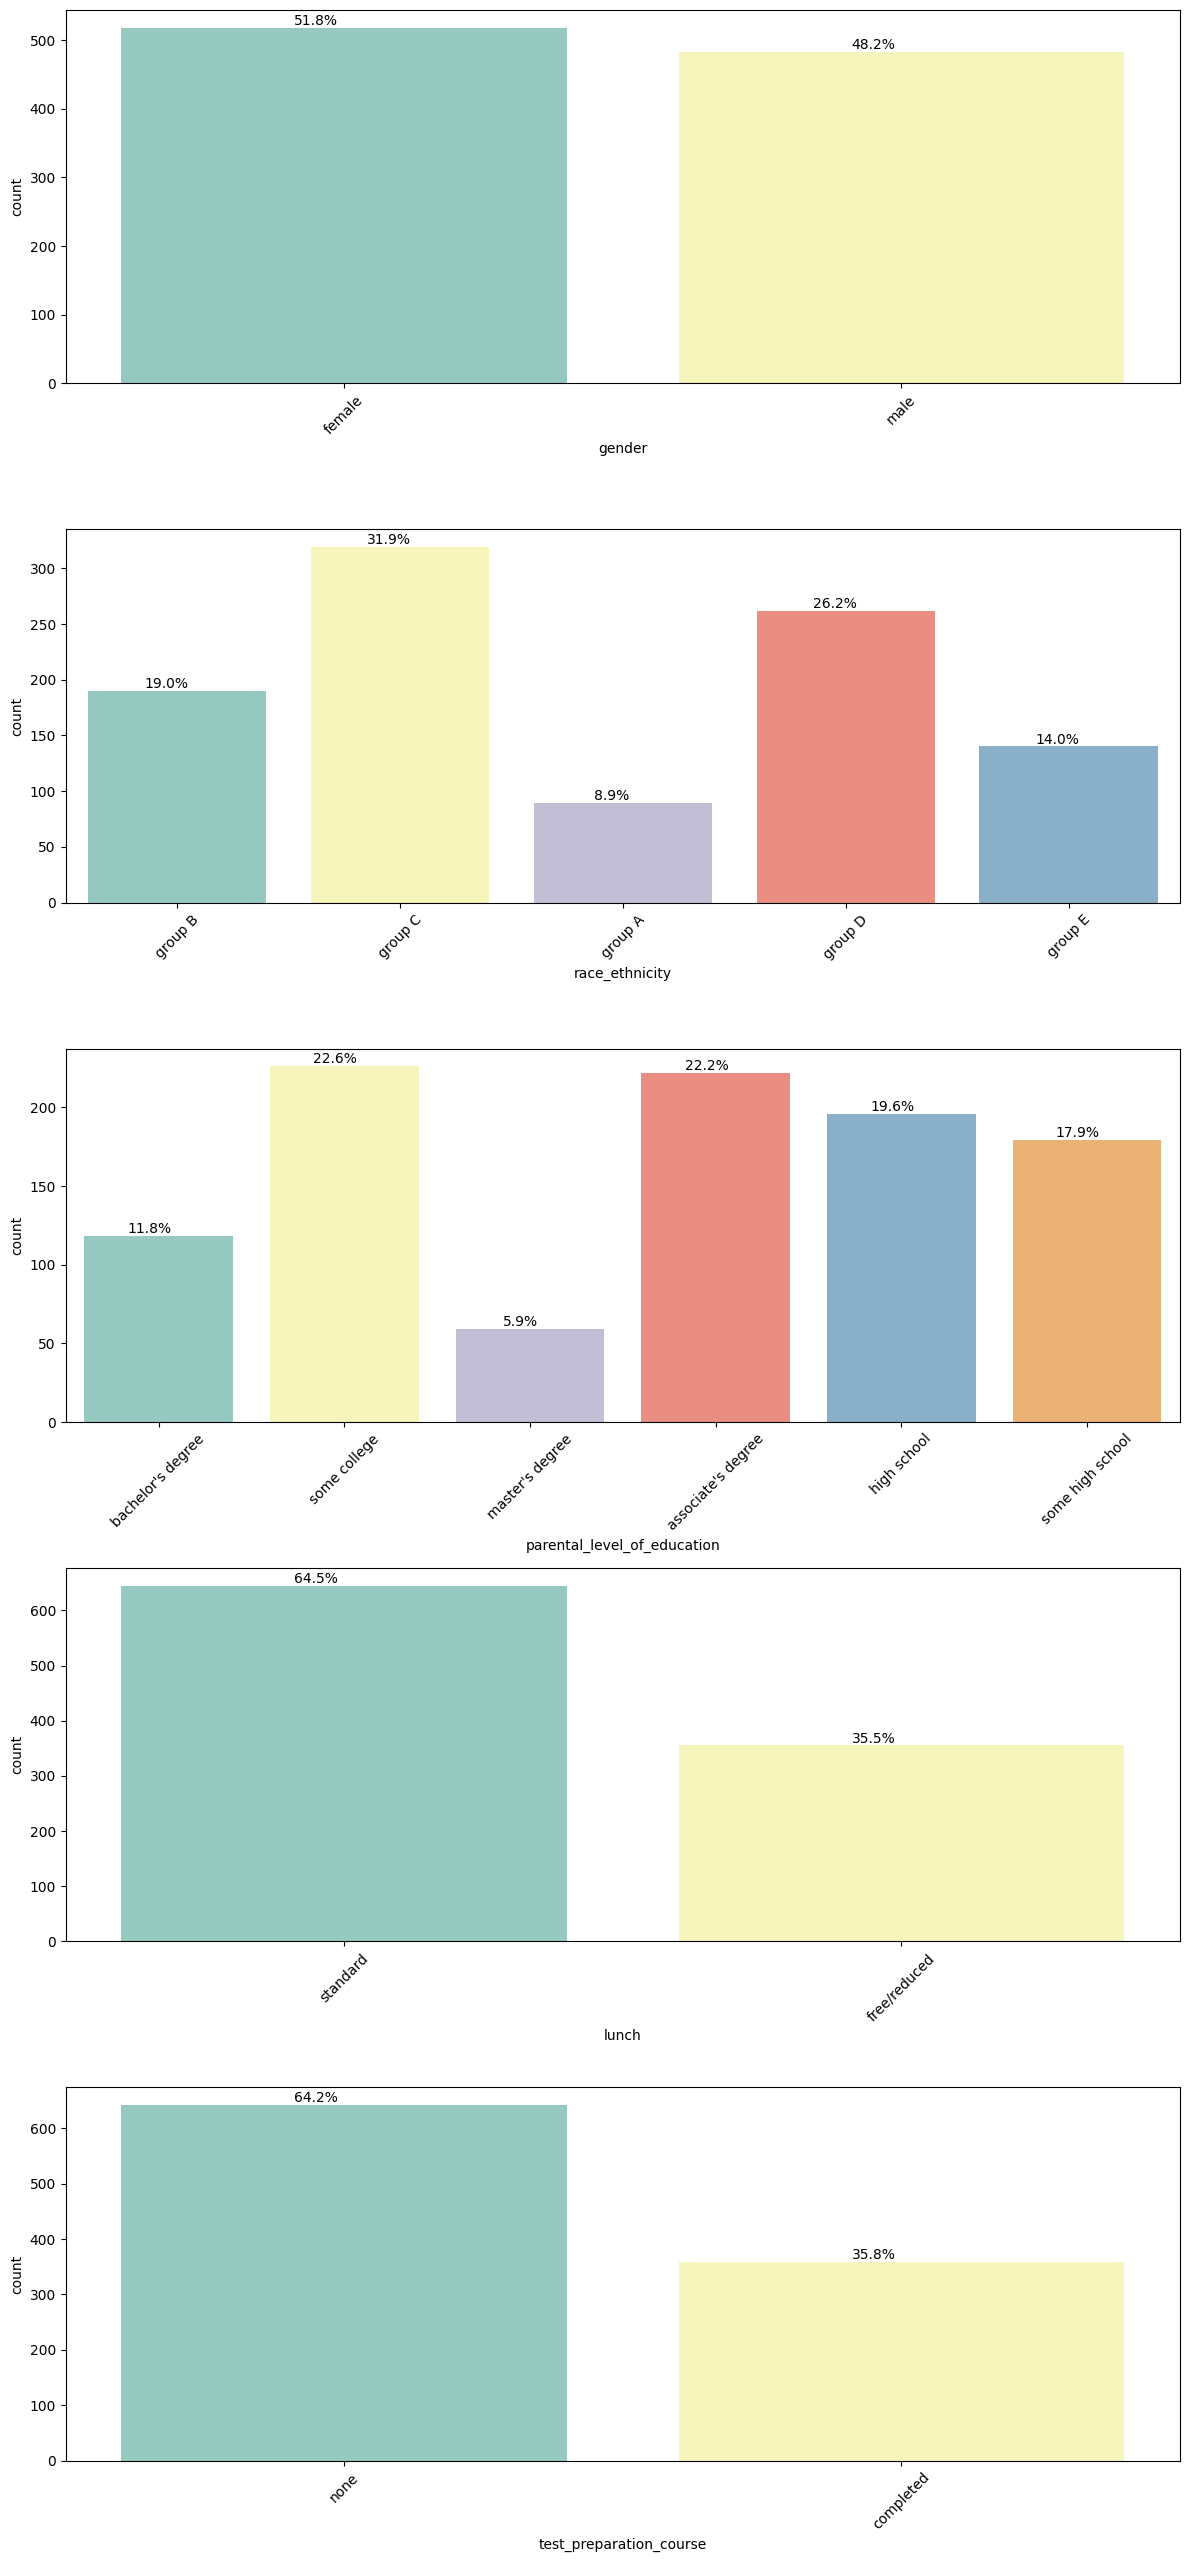

In [14]:
# Inorder to get the plot in percentage
plt.figure(figsize=(12,30))

for i in range(len(col)):
    plt.subplot(6, 1, i + 1)
    ax = sns.countplot(x=df[col[i]], palette="Set3")
    
    # Calculate the percentages
    total = len(df[col[i]])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.xlabel(col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### Now by plotting the numerical values with normal distribution(kde)

In [15]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [16]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [17]:
# To get only the numerical columns
num_col = [i for i in df.columns if df[i].dtype=='int64' ]

In [18]:
num_col

['math_score', 'reading_score', 'writing_score']

In [19]:
float(df[num_col[0]].mean())

66.089

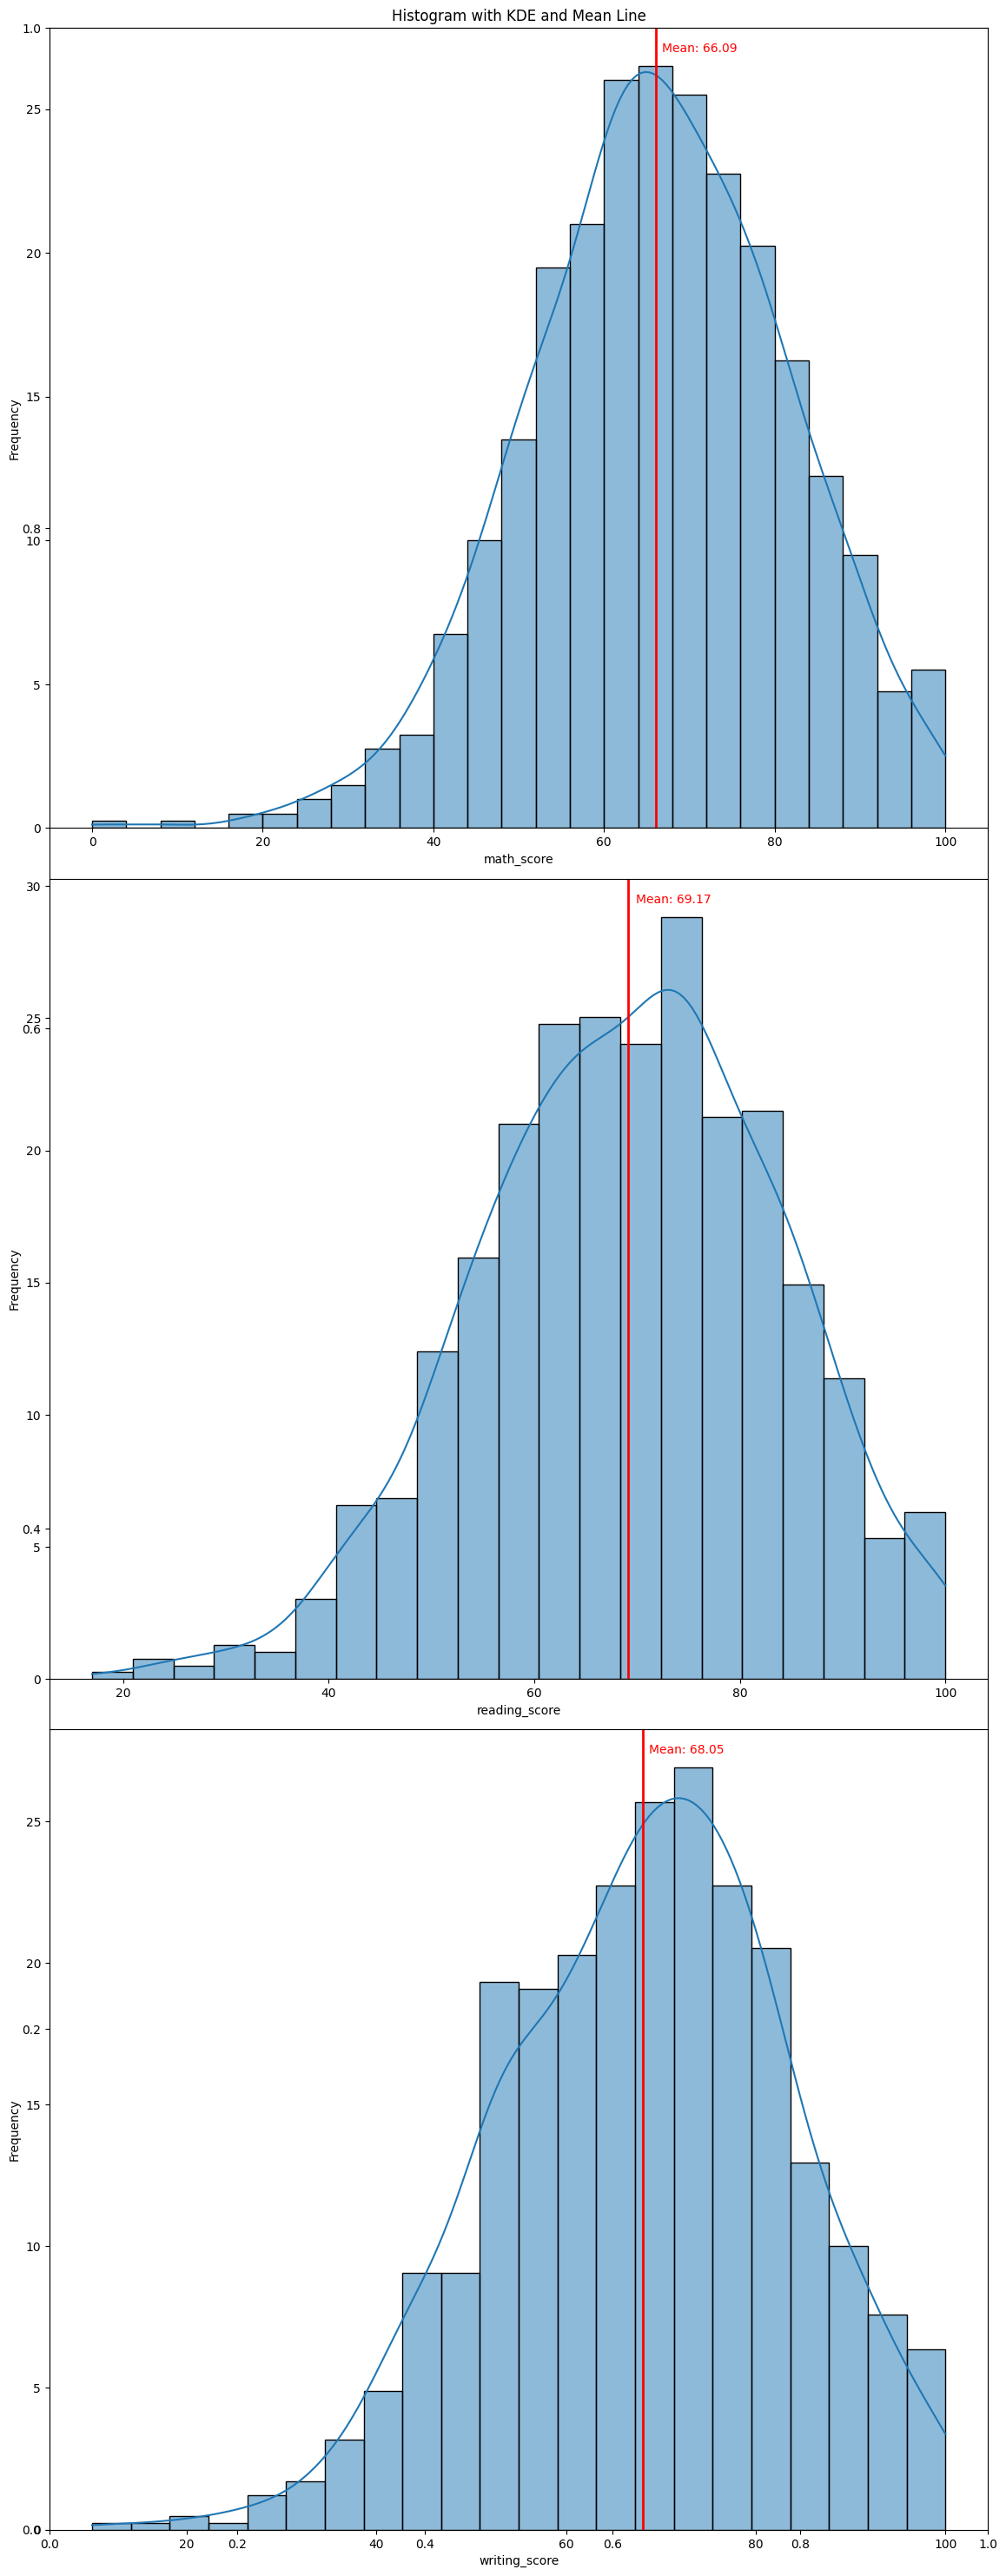

In [20]:
plt.figure(figsize=(12,30))
plt.title('Histogram with KDE and Mean Line')
for i in range(len(num_col)):
    plt.subplot(3,1,i+1)
    mean_value = float(df[num_col[i]].mean())
    sns.histplot(df[num_col[i]],stat = 'frequency', kde = True)
    plt.ylabel('Frequency')
    plt.axvline(mean_value,c = 'r',lw = 2)
    plt.text(mean_value + mean_value*0.01, plt.ylim()[1]*0.97, f'Mean: {mean_value:.2f}', color='r')
    plt.tight_layout()
    

<Axes: xlabel='gender', ylabel='math_score'>

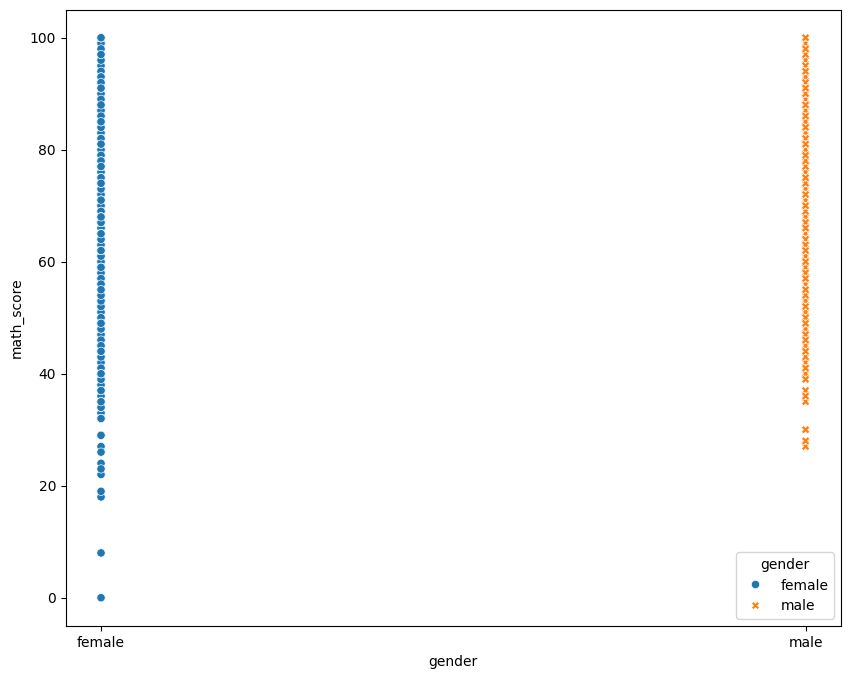

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df,x = 'gender',y = 'math_score', hue='gender',style='gender')

<Axes: xlabel='gender', ylabel='math_score'>

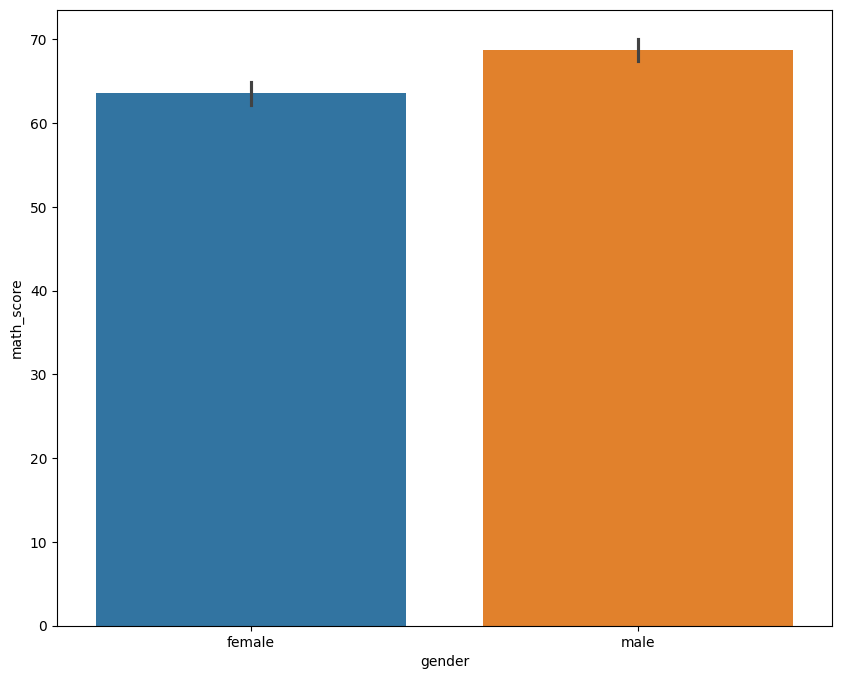

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data = df,x = 'gender',y = 'math_score',hue = 'gender')

### To know the average math_score for each gender

In [23]:
average_mathmark_gender = df.groupby('gender')['math_score'].mean().reset_index(name = 'average')

In [24]:
average_mathmark_gender

,gender,average
0,female,63.633205
1,male,68.728216


<Axes: xlabel='gender', ylabel='average'>

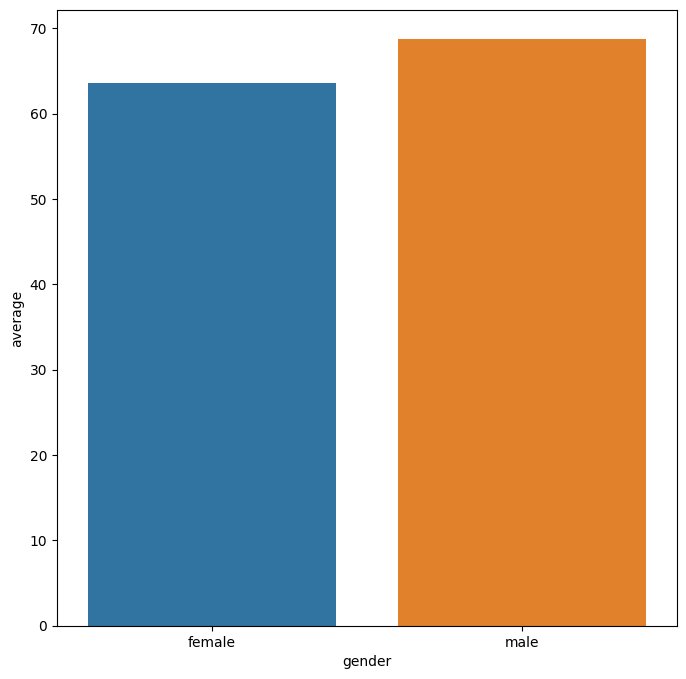

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(average_mathmark_gender,x = 'gender',y = 'average',hue = 'gender')

### correlation of reading and writing for each gender

Text(0.5, 1.0, 'Reading vs Writing Scores for feMale')

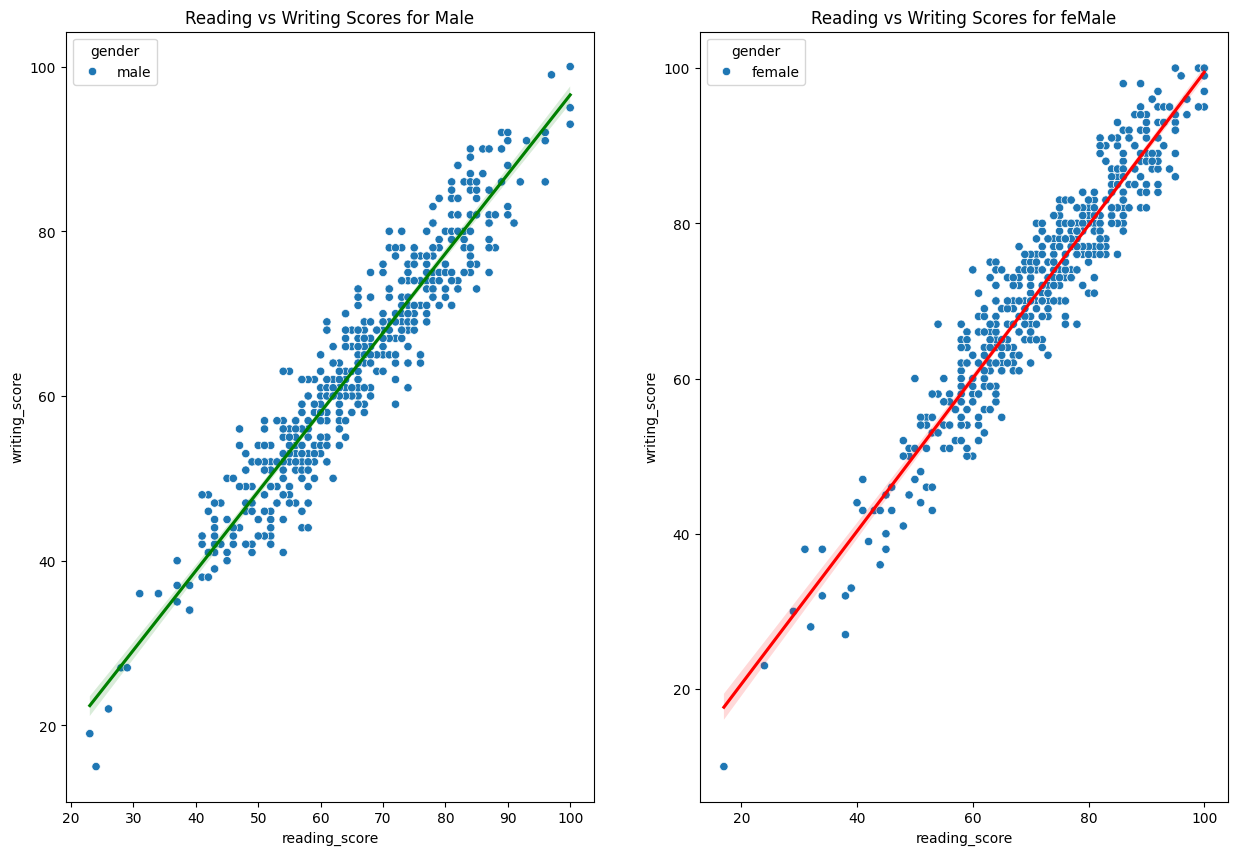

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot(df[df['gender'] == 'male'],x = 'reading_score',y = 'writing_score', hue = 'gender', style = 'gender')
sns.regplot(df[df['gender'] == 'male'], x = 'reading_score', y = 'writing_score', scatter=False, color = 'g')
plt.title('Reading vs Writing Scores for Male')

plt.subplot(1,2,2)
sns.scatterplot(df[df['gender'] == 'female'],x = 'reading_score',y = 'writing_score', hue = 'gender', style = 'gender')
sns.regplot(df[df['gender'] == 'female'], x = 'reading_score', y = 'writing_score', scatter=False, color = 'r')
plt.title('Reading vs Writing Scores for feMale')

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### To determine if there is a significant difference in math_score between students who had standard lunch and those who had free/reduced lunch

Text(0.5, 1.0, 'Math Scores by Lunch Type')

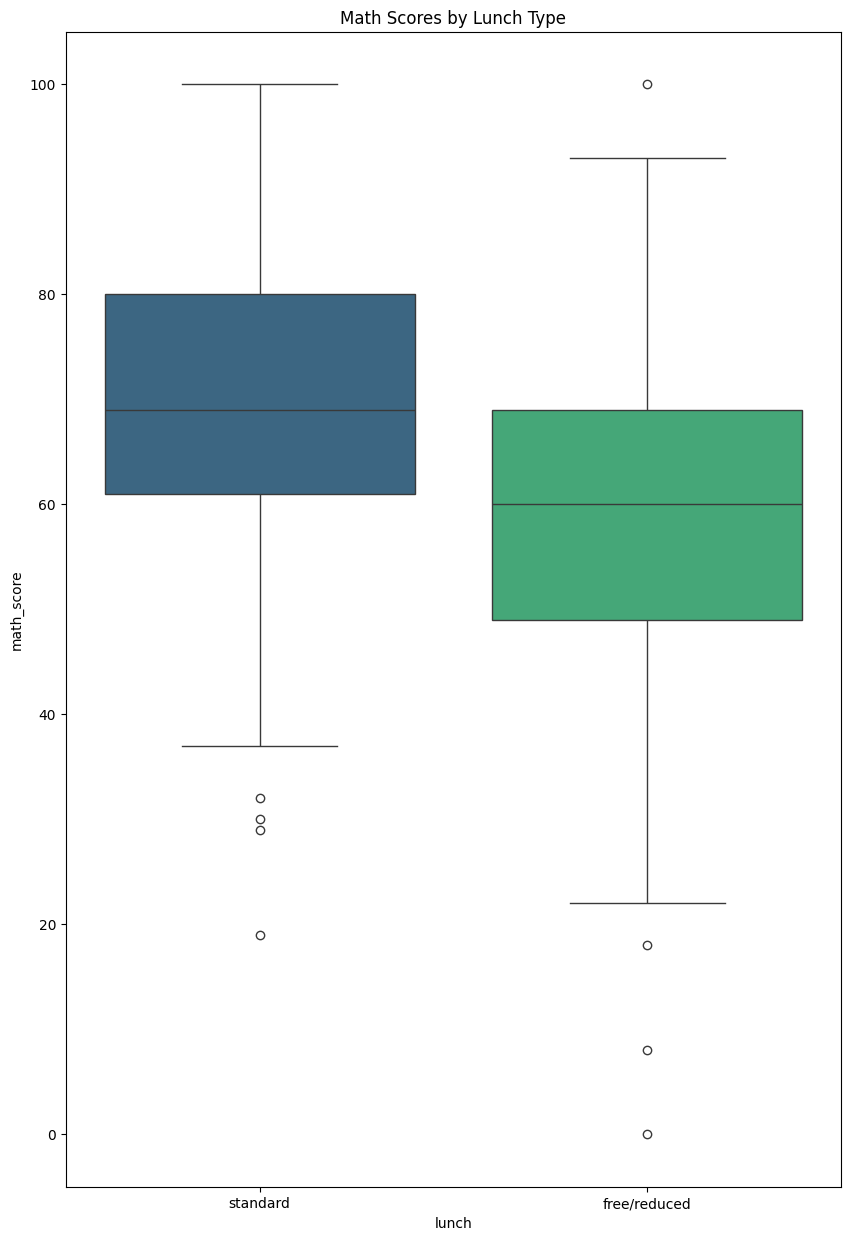

In [28]:
plt.figure(figsize=(10,15))
sns.boxplot(df, x = 'lunch', y = 'math_score',palette='viridis')
plt.title('Math Scores by Lunch Type')

In [32]:
df[num_col].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


<Axes: >

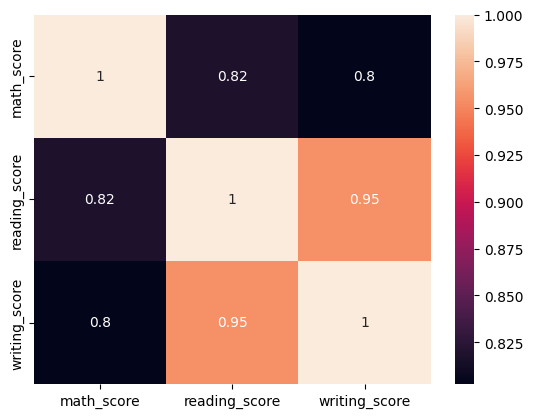

In [33]:
sns.heatmap(df[num_col].corr(),annot=True)